In [ ]:
import numpy as np
from google.colab import drive
import pandas as pd
import time 
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Datasets

images.csv		      question-3-features-train.csv
question-2-features.csv       question-3-labels-test.csv
question-2-labels.csv	      question-3-labels-train.csv
question-3-features-test.csv


Reading features and labels from csv files

In [ ]:
features = pd.read_csv("/content/drive/MyDrive/Datasets/question-2-features.csv")
labels = pd.read_csv("/content/drive/MyDrive/Datasets/question-2-labels.csv")

In [ ]:
"# of data: {0}, # of features {1}".format(*features.shape)

'# of data: 506, # of features 13'

Finding the rank of the features matrix

In [ ]:
arr = features.to_numpy()
np.linalg.matrix_rank(arr.T.dot(arr))

13

**Definition of Linear Regression Module**

In [ ]:
class linear_regressor(object):
    def __init__(self, features, labels):#, alpha, num_epochs):
        self.data_num = features.shape[0]
        self.feature_num = features.shape[1]
        self.features = self.normalize(features)
        self.labels = labels
        temp = pd.DataFrame(np.ones(features.shape[0]))
        temp = temp.join(features)
        self.feature_arr = temp.to_numpy()
        self.label_arr = labels.to_numpy()   #self.normalize(labels).to_numpy()
        self.thetas = np.ones((self.feature_num+1, 1))
        self.predictions = np.zeros(features.shape[0])
        # self.alpha = alpha
        # self.epoch = num_epochs

    def normalize(self, frame):
        min_val = frame.min()
        max_val = frame.max()
        divisor = (max_val - min_val)
        frame = (frame - min_val) / divisor
        return frame

    # def calculate_cost(self):
    #     temp = (self.label_arr - np.matmul(self.feature_arr, self.thetas))
    #     res = np.matmul(temp.T, temp) / (2*self.data_num)
    #     return res[0, 0]

    # def grad_descent(self):
    #     costs = []
    #     for _ in range(self.epoch):
    #         temp = np.matmul(self.feature_arr, self.thetas) - self.label_arr
    #         der_cost = np.matmul(self.feature_arr.T, temp) / self.data_num
    #         self.thetas = self.thetas - self.alpha * der_cost
    #         costs.append(self.calculate_cost())
    #     return costs
    
    def fit(self):
        temp = np.matmul(self.feature_arr.T, self.feature_arr)
        temp = np.linalg.inv(temp)
        temp2 = np.matmul(self.feature_arr.T, self.label_arr)
        temp = np.matmul(temp, temp2)
        self.thetas = temp
        return self.thetas
        # return self.grad_descent()

    def predict(self, data):
        if data.shape[0] != self.feature_num:
            data = data[1:]
        prediction = 1 * self.thetas[0, 0]
        for i in range(self.feature_num):
            prediction += self.thetas[i+1, 0] * data[i]
        return prediction

    def score(self):
        from math import sqrt
        error = 0
        for i in range(self.features.shape[0]):
            prediction = model.predict(self.feature_arr[i])
            self.predictions[i] = prediction
            error += (self.label_arr[i] - prediction) ** 2
        error = sqrt(error)# / self.features.shape[0]
        return error

Defining and Fitting The Model

In [ ]:
train_data = pd.DataFrame(features["LSTAT"])

In [ ]:
model = linear_regressor(train_data, labels)#, 0.01, 3000) #pd.DataFrame(features["LSTAT"])
costs = model.fit()
print(model.thetas)

[[34.55384088]
 [-0.95004935]]


In [ ]:
"%.4f"%model.score()

'0.2758'

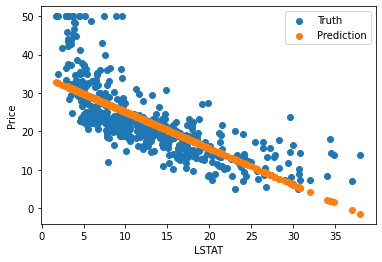

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_data, labels.to_numpy())
plt.scatter(train_data, model.predictions)
plt.xlabel("LSTAT")
plt.ylabel("Price")
plt.legend(("Truth", "Prediction"))
plt.show()

Using the square of LSTAT as a second feature

In [ ]:
train_data["LSTAT_SQUARE"] = train_data.to_numpy() ** 2
model = linear_regressor(train_data, labels)#, 0.01, 3000) #pd.DataFrame(features["LSTAT"])
costs = model.fit()
print(model.thetas)

[[42.86200733]
 [-2.3328211 ]
 [ 0.04354689]]


In [ ]:
"%.4f"%model.score()

'123.8840'

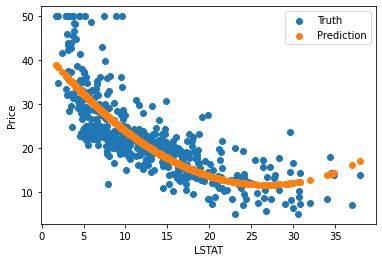

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_data["LSTAT"], labels.to_numpy())
plt.scatter(train_data["LSTAT"], model.predictions)
plt.xlabel("LSTAT")
plt.ylabel("Price")
plt.legend(("Truth", "Prediction"))
plt.show()